1. Descriptive Analysis of Additives (Columns “a” to “i”): Parametric/Non-Parametric Summaries, Correlation, and ANOVA


In [14]:
import pandas as pd
data = pd.read_csv('../data/ingredient.csv')

In [15]:
# Statistik deskriptif
descriptive_stats = data.describe()
descriptive_stats

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


Column: a
Statistics: 0.9037243723869324, p-value: 7.184646477753631e-08
Data does not look normal (reject H0)




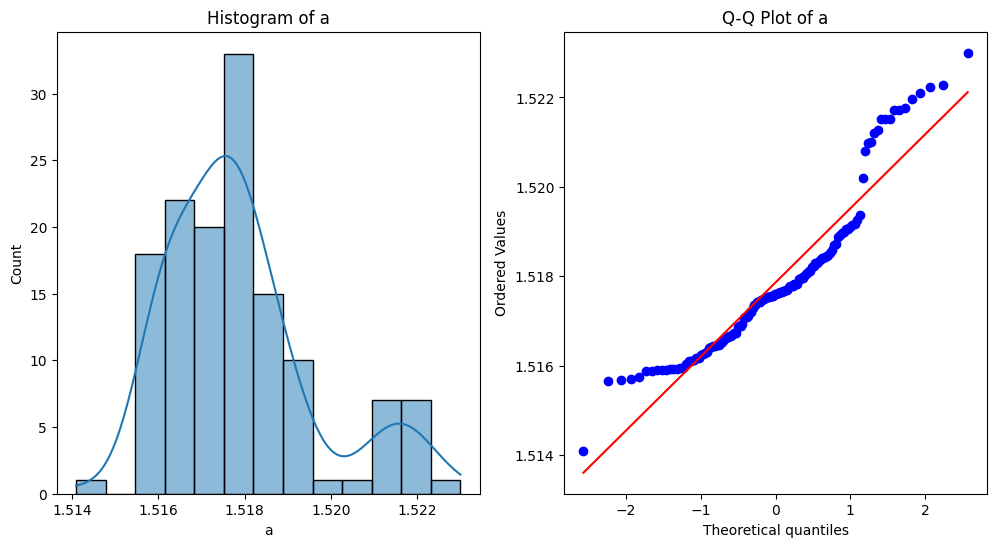

Column: b
Statistics: 0.95997554063797, p-value: 0.000517485779710114
Data does not look normal (reject H0)




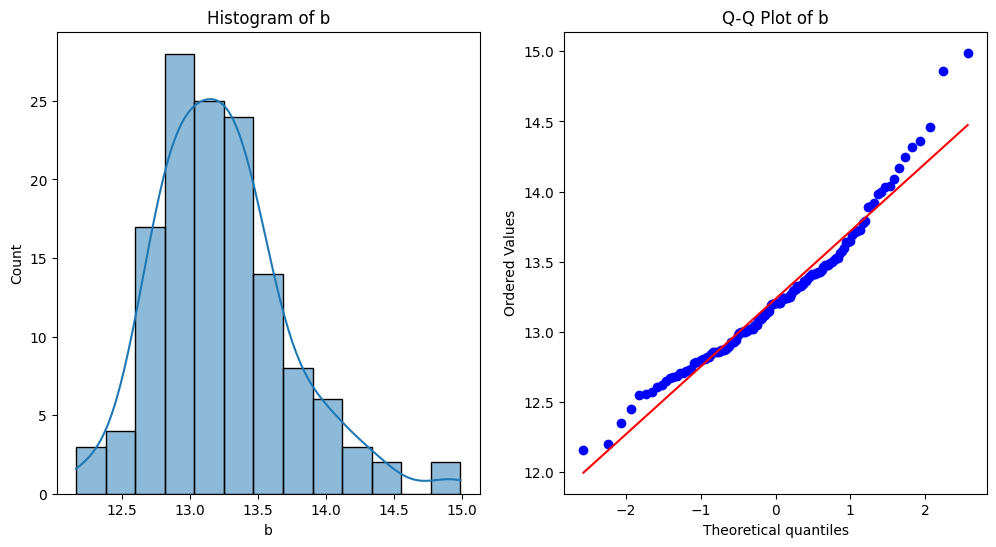

Column: c
Statistics: 0.6302168369293213, p-value: 5.403834953316226e-17
Data does not look normal (reject H0)




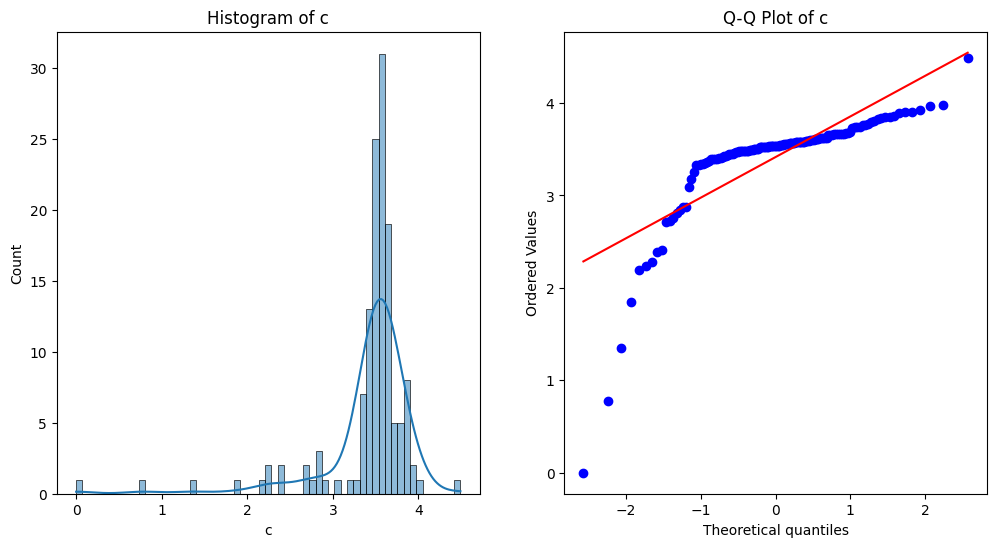

Column: d
Statistics: 0.9866201281547546, p-value: 0.20910891890525818
Data looks normal (fail to reject H0)




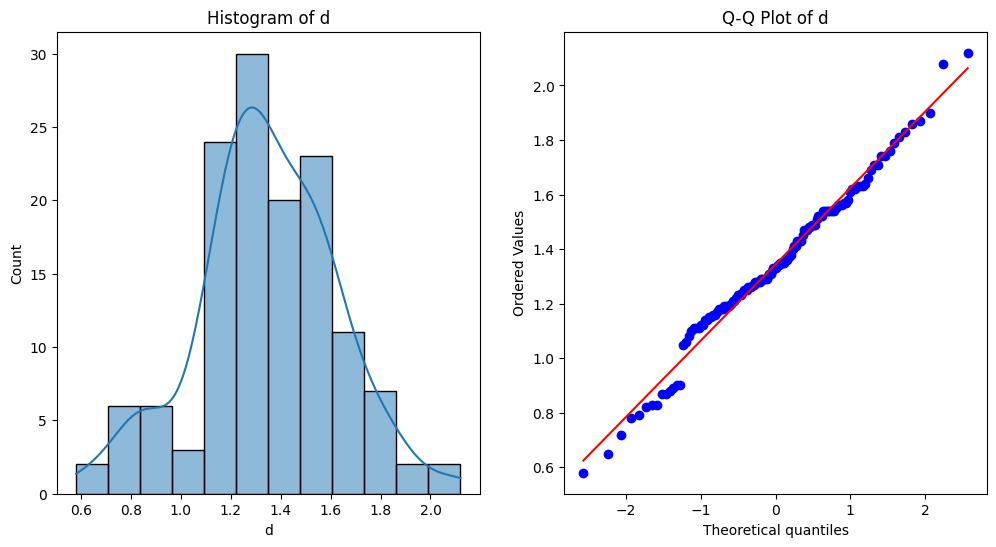

Column: e
Statistics: 0.9716642498970032, p-value: 0.0061763497069478035
Data does not look normal (reject H0)




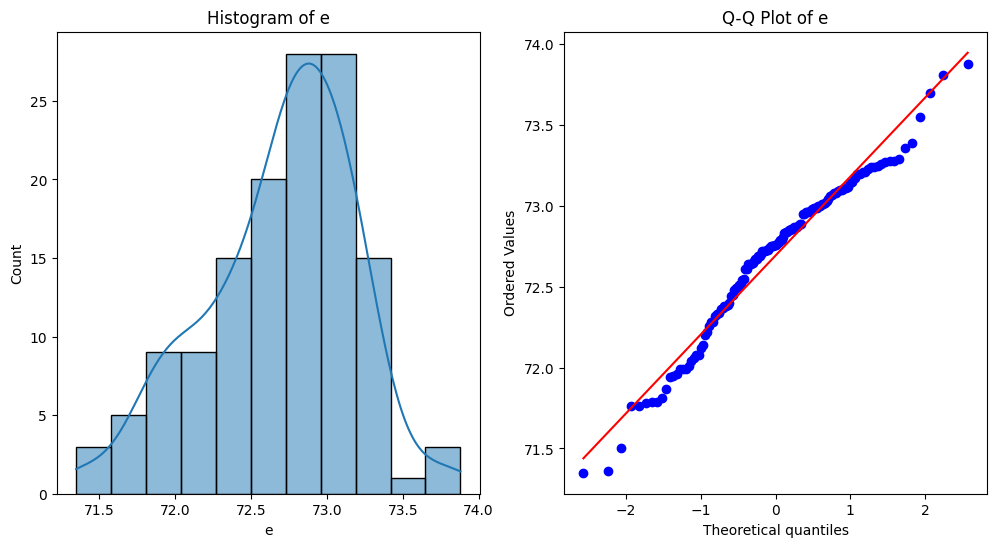

Column: f
Statistics: 0.8131850361824036, p-value: 7.113485581827783e-12
Data does not look normal (reject H0)




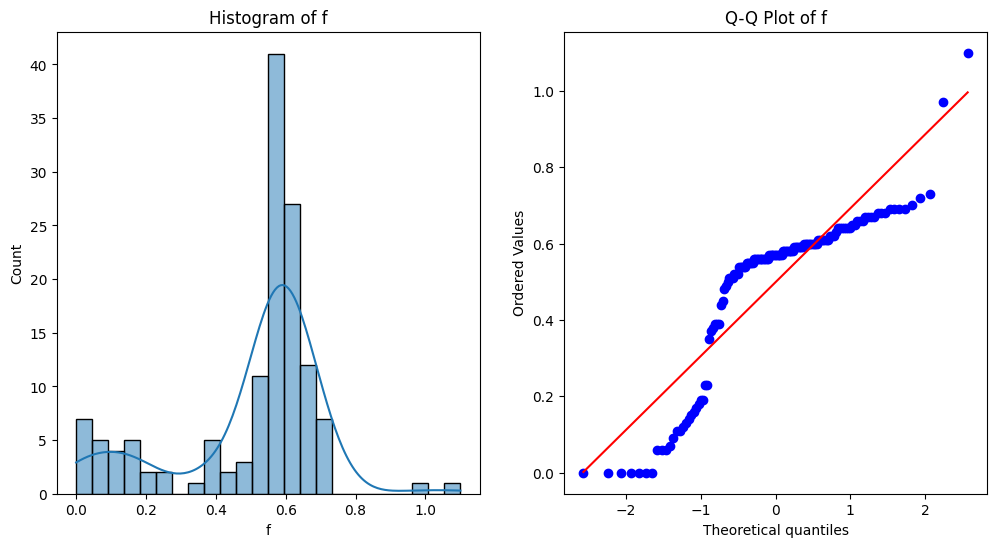

Column: g
Statistics: 0.9396464228630066, p-value: 1.2927630450576544e-05
Data does not look normal (reject H0)




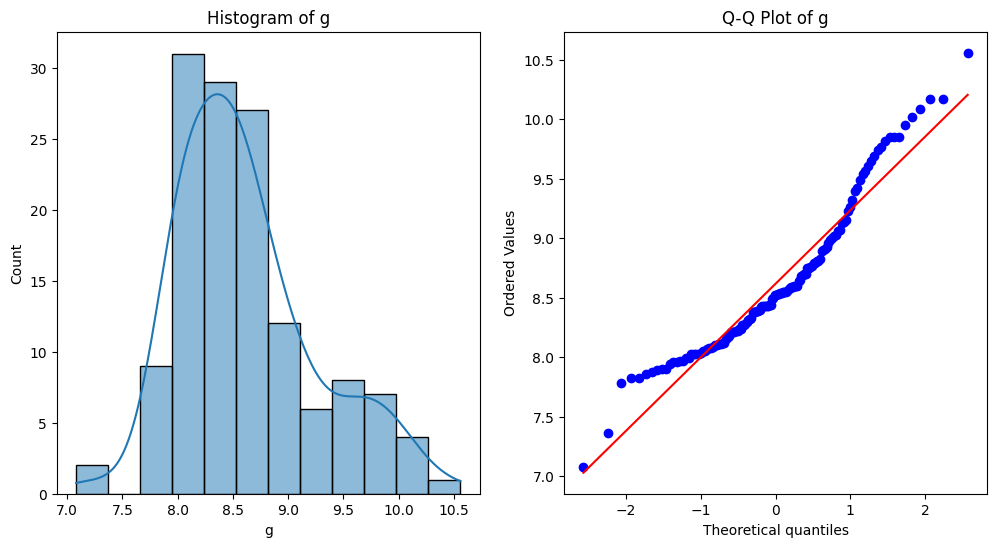

/home/delameta/rananum/transformer_and_transferlearning/venv/lib/python3.8/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Column: h
Statistics: 1.0, p-value: 1.0
Data looks normal (fail to reject H0)




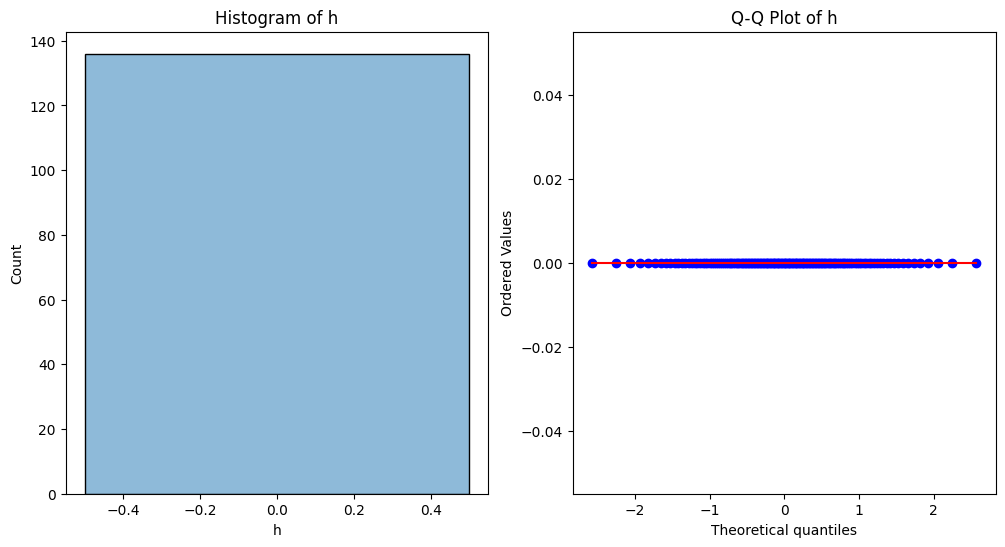

Column: i
Statistics: 0.6427308917045593, p-value: 1.0353947444012826e-16
Data does not look normal (reject H0)




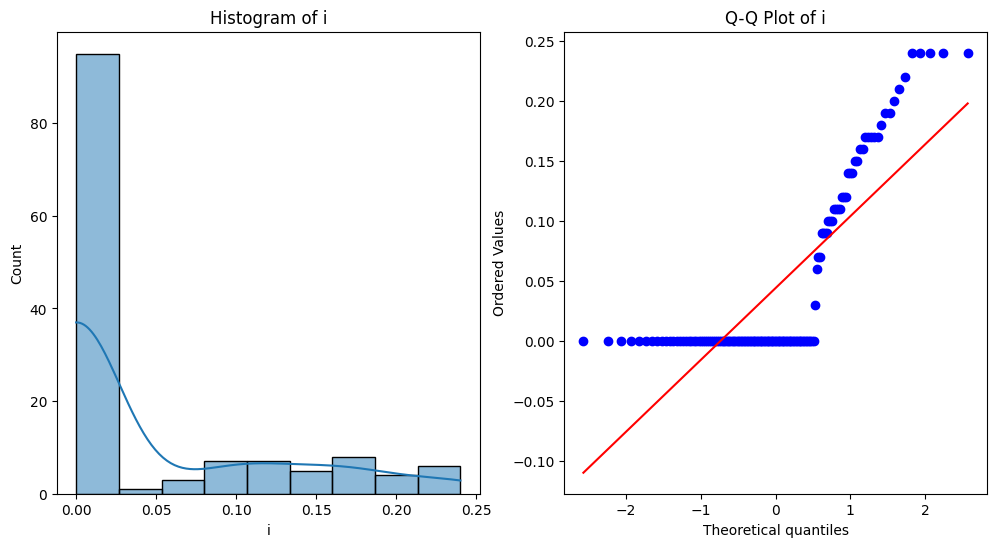

In [16]:
#Uji Normalitas
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Mengatasi Nilai Hilang
data_cleaned = data.dropna()  


# 2. Menghapus Outlier (Menggunakan IQR)
Q1 = data_cleaned.quantile(0.25)
Q3 = data_cleaned.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = data_cleaned[~((data_cleaned < (Q1 - 1.5 * IQR)) | (data_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

for column in df_cleaned.columns:
    if df_cleaned[column].dtype in [np.int64, np.float64]:  # Memeriksa kolom numerik
        stat, p_value = stats.shapiro(df_cleaned[column])
        print(f"Column: {column}")
        print(f"Statistics: {stat}, p-value: {p_value}")
        if p_value > 0.05:
            print("Data looks normal (fail to reject H0)")
        else:
            print("Data does not look normal (reject H0)")
        print("\n")

        # 4. Visualisasi
        plt.figure(figsize=(12, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_cleaned[column], kde=True)
        plt.title(f'Histogram of {column}')
        
        # Q-Q Plot
        plt.subplot(1, 2, 2)
        stats.probplot(df_cleaned[column], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {column}')
        
        plt.show()

In [17]:
import pandas as pd
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler

# Pembersihan Data
# Menghapus baris dengan nilai NaN di seluruh dataset
data_cleaned = data.dropna()

# Menghitung IQR untuk setiap kolom
Q1 = data_cleaned.quantile(0.25)
Q3 = data_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Menghapus outlier menggunakan IQR
data_cleaned = data_cleaned[~((data_cleaned < (Q1 - 1.5 * IQR)) | (data_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

# Standarisasi Data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_cleaned), columns=data_cleaned.columns)

# Uji ANOVA antara semua kolom
columns = data_scaled.columns
anova_results = []

# Menghitung ANOVA untuk setiap kolom dibandingkan dengan kolom lainnya
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        
        # Menghapus baris dengan nilai NaN setelah pembersihan
        data_pair = data_scaled[[col1, col2]].dropna()
        
        # Uji ANOVA
        f_stat, p_value = f_oneway(data_pair[col1], data_pair[col2])
        
        # Simpan hasil ANOVA
        anova_results.append({
            'Column 1': col1,
            'Column 2': col2,
            'F-statistic': f_stat,
            'p-value': p_value,
            'Significant Difference': 'Yes' if p_value < 0.05 else 'No'
        })

# Menampilkan hasil ANOVA dalam tabel
anova_results_df = pd.DataFrame(anova_results)
print("\nANOVA Results:")
anova_results_df.head(10)



ANOVA Results:


,Column 1,Column 2,F-statistic,p-value,Significant Difference
0,a,b,2.257884e-25,1.0,No
1,a,c,2.290123e-25,1.0,No
2,a,d,2.230433e-25,1.0,No
3,a,e,1.096409e-25,1.0,No
4,a,f,2.265284e-25,1.0,No
5,a,g,2.380350e-25,1.0,No
6,a,h,4.558190e-25,1.0,No
7,a,i,2.284734e-25,1.0,No
8,b,c,9.190165e-30,1.0,No
9,b,d,9.028226e-30,1.0,No


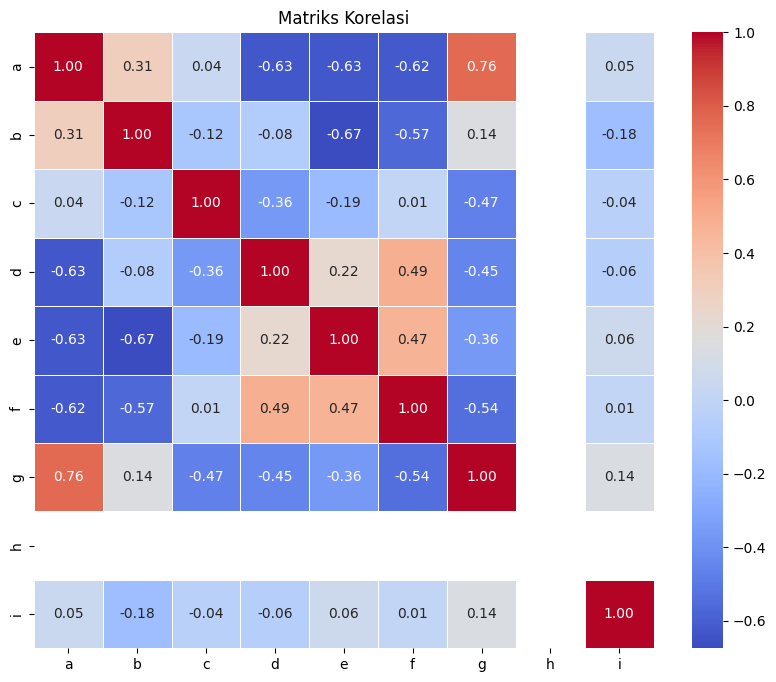

Matriks Korelasi:


,a,b,c,d,e,f,g,h,i
a,1.000000,0.306245,0.041342,-0.634328,-0.630537,-0.618174,0.762795,NaN,0.050620
b,0.306245,1.000000,-0.120900,-0.075339,-0.674300,-0.565736,0.143260,NaN,-0.175159
c,0.041342,-0.120900,1.000000,-0.363735,-0.193589,0.009072,-0.470654,NaN,-0.043090
d,-0.634328,-0.075339,-0.363735,1.000000,0.224517,0.486540,-0.445555,NaN,-0.057493
e,-0.630537,-0.674300,-0.193589,0.224517,1.000000,0.466566,-0.362872,NaN,0.060168
f,-0.618174,-0.565736,0.009072,0.486540,0.466566,1.000000,-0.542178,NaN,0.009638
g,0.762795,0.143260,-0.470654,-0.445555,-0.362872,-0.542178,1.000000,NaN,0.137881
h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
i,0.050620,-0.175159,-0.043090,-0.057493,0.060168,0.009638,0.137881,NaN,1.000000


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = data_cleaned.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

# Menampilkan matriks korelasi
print("Matriks Korelasi:")
correlation_matrix

2. Graphical Analysis of Additives: A Distribution Study

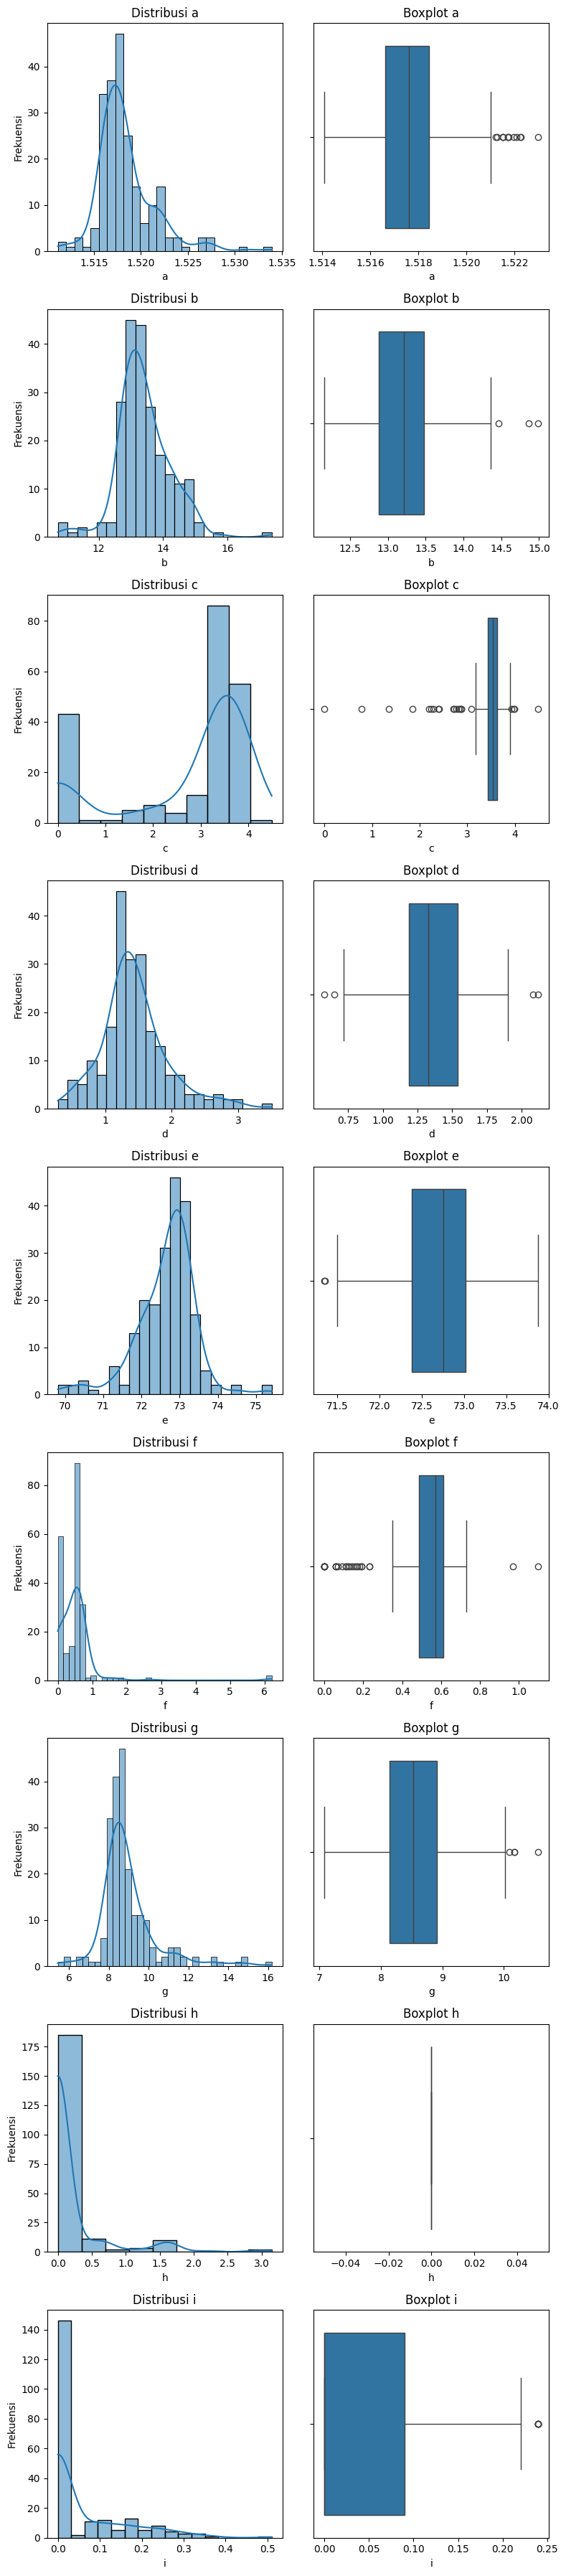

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menentukan jumlah kolom
num_columns = len(data_cleaned.columns)

# Membuat figure dan axes untuk histogram dan boxplot
fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(8, 4 * num_columns))

# Loop untuk plot histogram dan boxplot
for i, column in enumerate(data_cleaned.columns):
    # Plot histogram
    sns.histplot(data[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribusi {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frekuensi')
    
    # Plot boxplot
    sns.boxplot(x=data_cleaned[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot {column}')
    axes[i, 1].set_xlabel(column)

# Menyesuaikan layout
plt.tight_layout()
plt.show()


3. A Clustering Test to Determine the Distinctive Number of Formulations Present in the Dataset

Hasil Klastering dengan KMeans:
Silhouette Score: 0.4556244033492346


/home/delameta/rananum/transformer_and_transferlearning/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_158470/1272024577.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = clusters


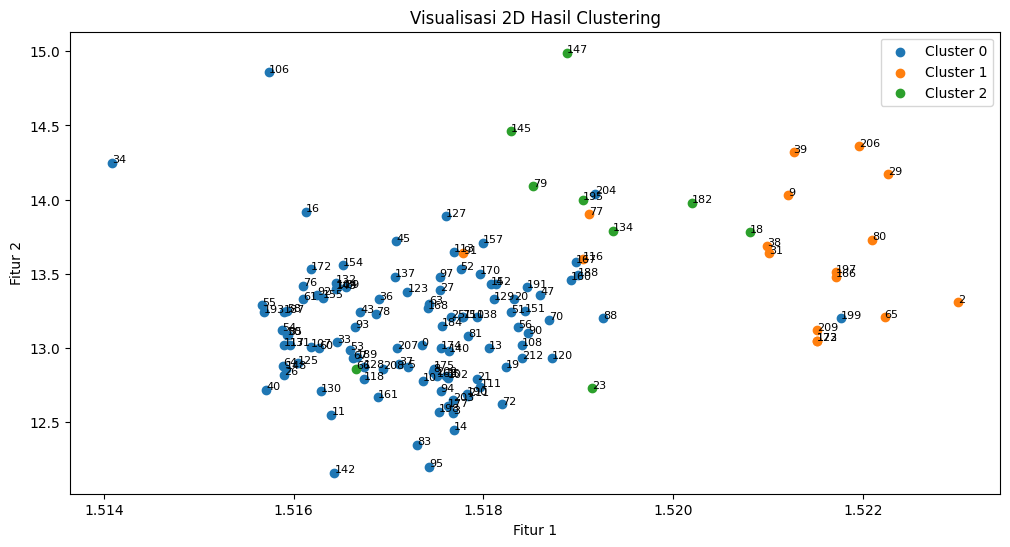

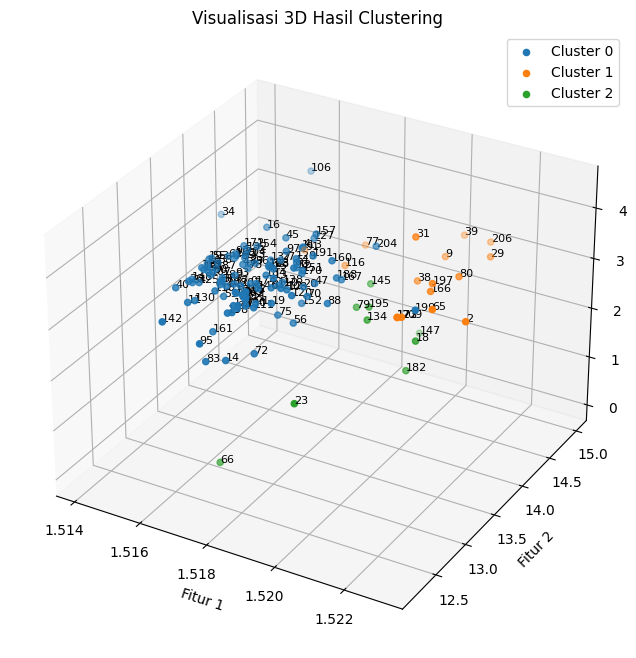

Hasil Klastering dengan DBSCAN:
Silhouette Score: -0.24285754027132717


/tmp/ipykernel_158470/1272024577.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = clusters


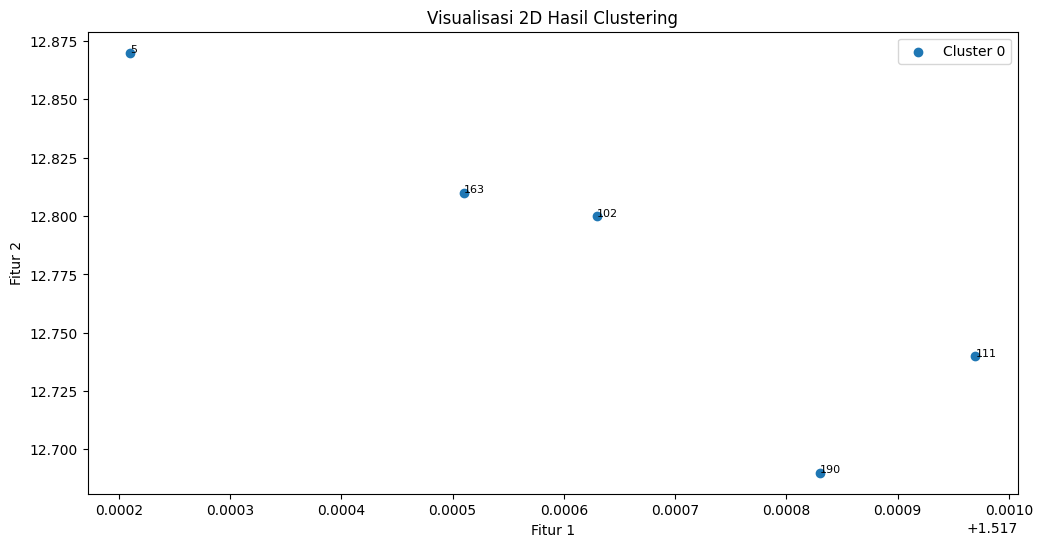

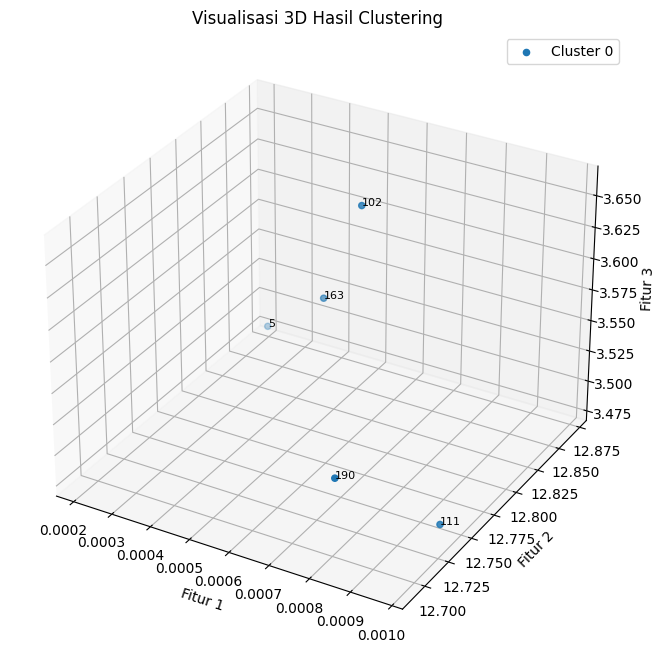

Hasil Klastering dengan Agglomerative Clustering:
Silhouette Score: 0.4391884192522215


/tmp/ipykernel_158470/1272024577.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = clusters


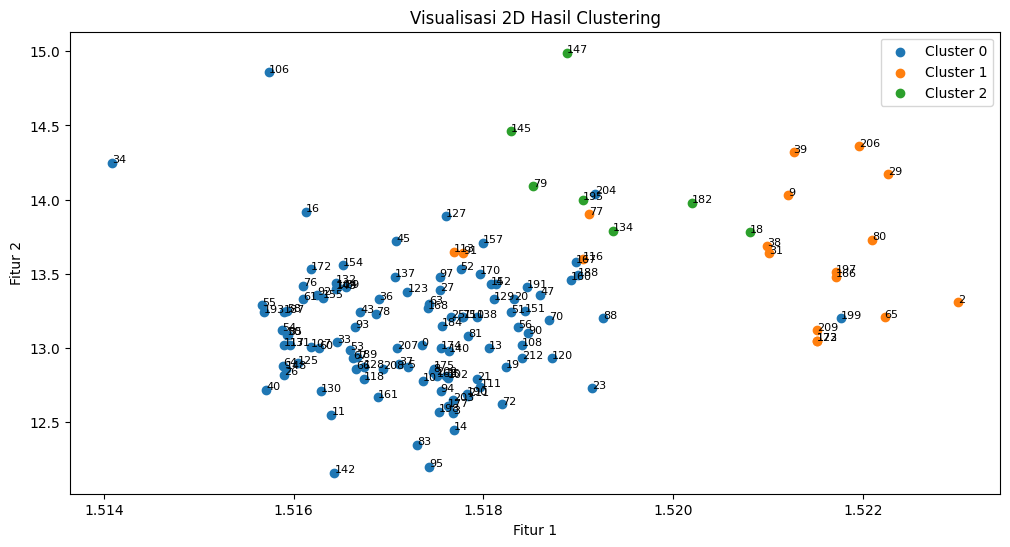

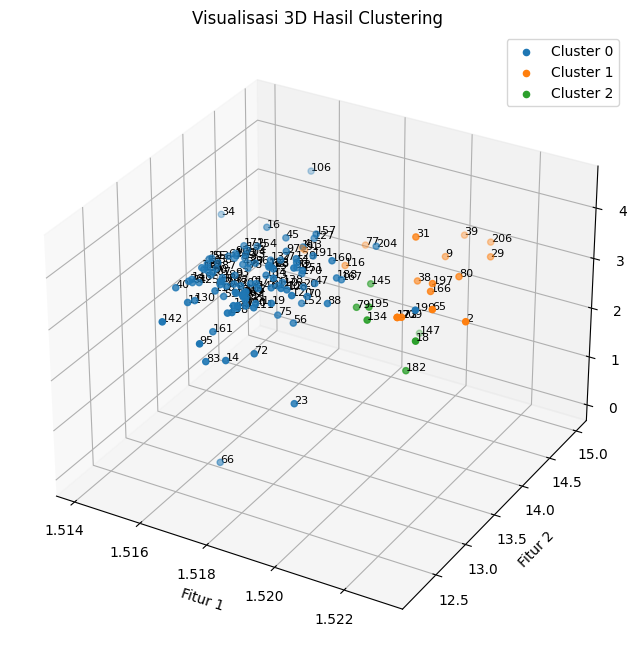

Hasil Klastering dengan Gaussian Mixture Model:
Silhouette Score: 0.44750031129720286


/tmp/ipykernel_158470/1272024577.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = clusters


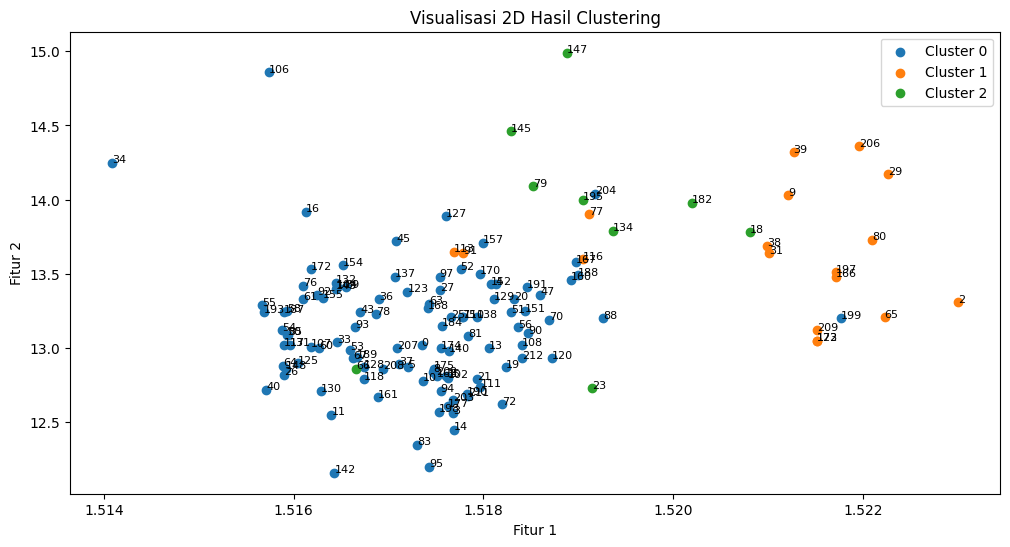

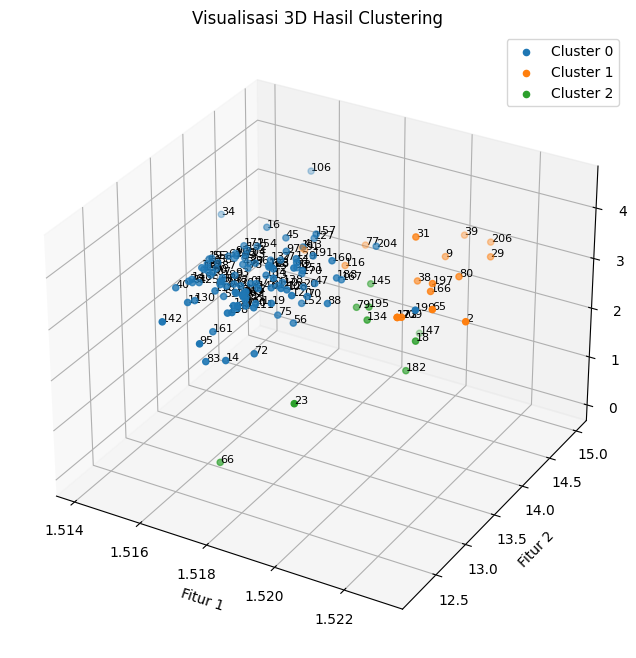

Hasil Klastering dengan Mean Shift:


/tmp/ipykernel_158470/1272024577.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = clusters


Silhouette Score: 0.4166975708067384


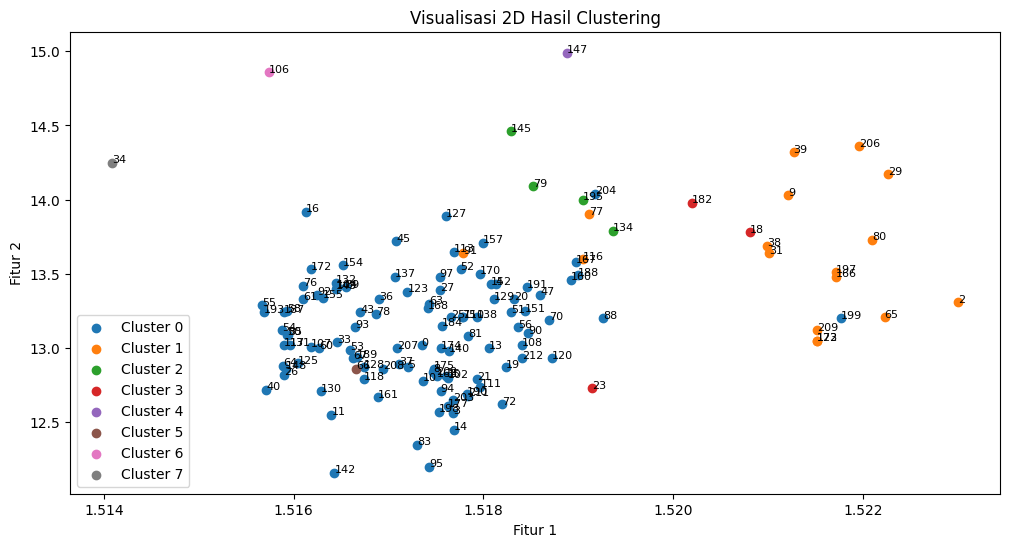

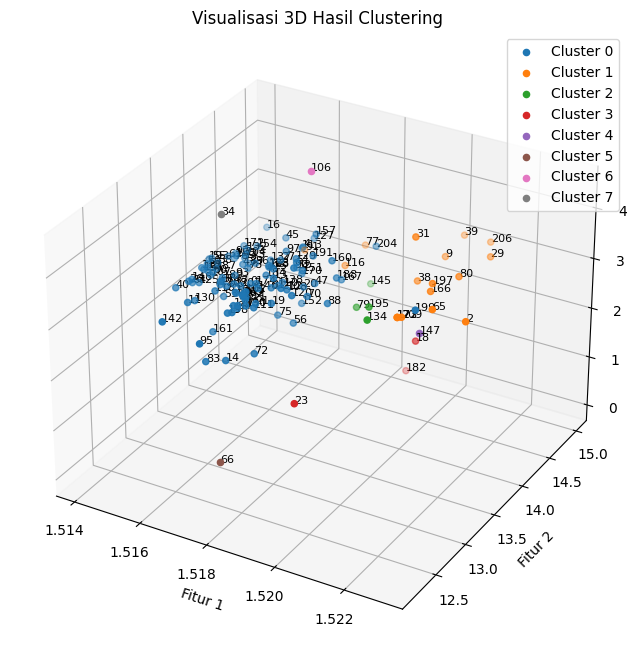

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Memuat data
data = pd.read_csv('../data/ingredient.csv')

# Mengidentifikasi dan menghapus outlier
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return filtered_df

# Identifikasi dan hapus outlier
filtered_data = remove_outliers_iqr(data)

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Fungsi visualisasi clustering
def plot_clusters(data, clusters, num_clusters):
    plt.figure(figsize=(12, 6))
    for i in range(num_clusters):
        cluster_data = data[clusters == i]
        plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {i}')
        for idx, row in cluster_data.iterrows():
            plt.text(row.iloc[0], row.iloc[1], f'{idx}', fontsize=8)
    plt.xlabel('Fitur 1')
    plt.ylabel('Fitur 2')
    plt.title('Visualisasi 2D Hasil Clustering')
    plt.legend()
    plt.show()

    if data.shape[1] > 2:
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        for i in range(num_clusters):
            cluster_data = data[clusters == i]
            scatter = ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], label=f'Cluster {i}')
            for idx, row in cluster_data.iterrows():
                ax.text(row.iloc[0], row.iloc[1], row.iloc[2], f'{idx}', fontsize=8)
        ax.set_xlabel('Fitur 1')
        ax.set_ylabel('Fitur 2')
        ax.set_zlabel('Fitur 3')
        ax.set_title('Visualisasi 3D Hasil Clustering')
        ax.legend()
        plt.show()

# KMeans
print("Hasil Klastering dengan KMeans:")
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(scaled_data)
filtered_data['Cluster'] = clusters
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg}')
plot_clusters(filtered_data, clusters, 3)

# DBSCAN
print("Hasil Klastering dengan DBSCAN:")
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_data)
filtered_data['Cluster'] = clusters
silhouette_avg = silhouette_score(scaled_data, clusters) if len(set(clusters)) > 1 else -1
print(f'Silhouette Score: {silhouette_avg}')
plot_clusters(filtered_data, clusters, len(set(clusters)) - (1 if -1 in clusters else 0))

# Agglomerative Clustering
print("Hasil Klastering dengan Agglomerative Clustering:")
agglomerative = AgglomerativeClustering(n_clusters=3)
clusters = agglomerative.fit_predict(scaled_data)
filtered_data['Cluster'] = clusters
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg}')
plot_clusters(filtered_data, clusters, 3)

# Gaussian Mixture Model (GMM)
print("Hasil Klastering dengan Gaussian Mixture Model:")
gmm = GaussianMixture(n_components=3, random_state=0)
clusters = gmm.fit_predict(scaled_data)
filtered_data['Cluster'] = clusters
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg}')
plot_clusters(filtered_data, clusters, 3)

# Mean Shift
print("Hasil Klastering dengan Mean Shift:")
mean_shift = MeanShift()
clusters = mean_shift.fit_predict(scaled_data)
filtered_data['Cluster'] = clusters
silhouette_avg = silhouette_score(scaled_data, clusters) if len(set(clusters)) > 1 else -1
print(f'Silhouette Score: {silhouette_avg}')
plot_clusters(filtered_data, clusters, len(set(clusters)))
